In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [2]:
df = pd.read_csv("/kaggle/input/social-network-ads/Social_Network_Ads.csv")

In [3]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
X = df.iloc[:, 0:2]
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [5]:
y = df.iloc[:, -1]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

2025-08-15 14:54:51.966566: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755269692.261004      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755269692.352439      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [8]:
model = Sequential()

In [9]:
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-15 14:55:08.095711: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.4059 - loss: 2185.3838 - val_accuracy: 0.6500 - val_loss: 794.8270
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6447 - loss: 545.9842 - val_accuracy: 0.3500 - val_loss: 226.4398
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4444 - loss: 180.6010 - val_accuracy: 0.3500 - val_loss: 232.4063
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4586 - loss: 154.6274 - val_accuracy: 0.3500 - val_loss: 44.4531
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5680 - loss: 34.4088 - val_accuracy: 0.3500 - val_loss: 72.0438
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4364 - loss: 86.7241 - val_accuracy: 0.6500 - val_loss: 87.1430
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5879 - loss: 55.6564 - val_accuracy: 0.3500 - val_loss: 42.7184
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5034 - loss: 64.

In [13]:
import matplotlib.pyplot as plt

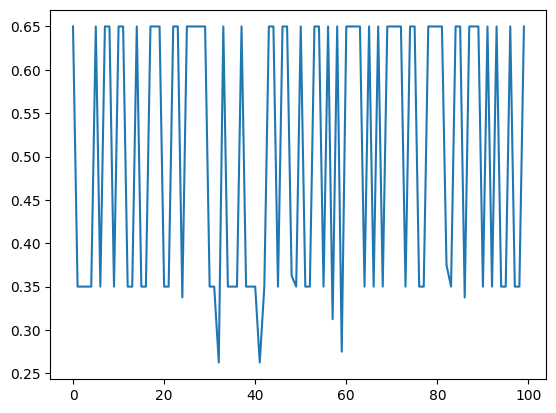

In [14]:
plt.plot(history.history['val_accuracy'])

In [15]:
# this happens because our data is much diverse
# like age is in the range of 0-100 while the salary is in thousands

Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
X_trained_scaled = scaler.fit_transform(X_train)
X_trained_scaled

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763],
       [-0.57615058,  1.44629156],
       [ 0.3069328 , -0.53179168],
       [ 0.99377543,  0.10817643],
       [-1.16487283,  0.45724994],
       [-1.55735433,  0.31180264],
       [ 1.0918958 ,  0.45724994],
       [-0.18366908, -0.47361276],
       [ 0.20881242, -0.32816546],
       [ 0.3069328 ,  0.28271318],
       [-1.16487283, -1.57901222],
       [ 0.11069205,  0.25362372],
       [ 2.07309956,  1.73718616],
       [ 0.40505317, -0.18271817],
       [ 1.4843773 ,  2.11534913],
       [-0.37990983,  1.21357589],
       [ 1.87685881,  1.50447048],
       [ 0.11069205,  0.02090805],
       [ 0.89565505, -1.31720709],
       [-1.36111358, -1.49174384],
       [-0.18366908, -0.5899706 ],
       [-0.57615058,  2.31897535],
       [ 0.99377543, -1.20084925],
       [-0.77239133,  1.06812859],
       [ 2.17121993,

In [18]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled

array([[ 0.80285749, -1.39649711],
       [ 1.93579072,  0.62530293],
       [-0.76581929, -0.72256376],
       [ 0.97715491,  0.8703696 ],
       [-0.67867058, -1.21269711],
       [-0.59152187, -0.17116375],
       [ 0.8900062 ,  1.20733627],
       [-0.67867058,  0.47213626],
       [ 0.27996523,  0.22706959],
       [ 0.45426265, -0.07926375],
       [-0.15577832, -0.07926375],
       [ 1.41289846, -1.0288971 ],
       [-1.20156284, -0.60003043],
       [-1.46300897, -1.36586378],
       [-0.59152187,  0.5946696 ],
       [-0.15577832,  1.23796961],
       [ 1.32574975, -0.90636377],
       [ 0.80285749,  0.19643625],
       [ 0.19281652, -0.78383043],
       [ 1.67434459, -0.23243042],
       [-1.28871155, -1.24333044],
       [-0.67867058,  0.38023626],
       [ 0.8900062 , -1.36586378],
       [ 1.93579072,  0.25770292],
       [-1.55015768, -1.48839711],
       [ 1.23860104, -1.36586378],
       [ 0.45426265,  0.38023626],
       [ 0.0185191 , -0.44686376],
       [ 1.58719588,

In [19]:
model = Sequential()

In [20]:
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history = model.fit(X_trained_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7246 - loss: 0.6505 - val_accuracy: 0.7875 - val_loss: 0.5936
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7772 - loss: 0.6003 - val_accuracy: 0.8000 - val_loss: 0.5418
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7858 - loss: 0.5532 - val_accuracy: 0.8125 - val_loss: 0.4983
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8083 - loss: 0.4963 - val_accuracy: 0.8375 - val_loss: 0.4603
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8183 - loss: 0.4814 - val_accuracy: 0.8375 - val_loss: 0.4295
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7714 - loss: 0.4503 - val_accuracy: 0.8500 - val_loss: 0.3998
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8392 - loss: 0.4281 - val_accuracy: 0.8625 - val_loss: 0.3745
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8634 - loss: 0.4128 - val_accuracy: 0.87

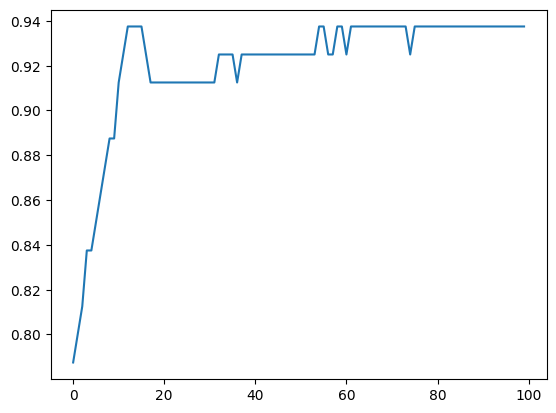

In [24]:
plt.plot(history.history['val_accuracy'])